# Dvocas 4

In [50]:
# Import potrebnih biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm



### Učitvanje seta podataka

In [51]:
# Load dataset
df = pd.read_csv('./data/boston.csv')

# crim: Stopa kriminala po glavi stanovnika u naselju
# zn: Procenat velikih stambenih parcela (preko 25.000 kvadratnih stopa)
# indus: Procenat površina namenjenih nestambenim poslovnim zonama u naselju
# chas: Da li se nekretnina nalazi pored reke Charles (1 = da, 0 = ne)
# nox: Koncentracija azotnih oksida u vazduhu (zagađenje)
# rm: Prosečan broj soba po stambenoj jedinici
# age: Procenat starih stanova (izgrađenih pre 1940) koje vlasnici koriste
# dis: Prosečna udaljenost do poslovnih centara u Bostonu (ponderisana)
# rad: Indeks pristupa autoputevima (radijalnim)
# tax: Godišnji porez na imovinu po 10.000 dolara vrednosti
# lstat: Procenat stanovništva niže socioekonomske klase (eng. lower status).
# medv: Medijana vrednosti kuća u naselju (u hiljadama dolara). Ovo je često zavisna varijabla u analizama.
# ptratio: Odnos broja učenika i nastavnika u osnovnim i srednjim školama u naselju (pupil-teacher ratio).

### Pregled seta podataka


In [52]:
# Prikaži prvih nekoliko redova
print("Prvih nekoliko redova:")
display(df.head())

# Prikaži osnovne informacije i tipove podataka
print("Info o kolonama:")
df.info()

# Prikaži osnovnu statistiku
print("Osnovna statistika:")
display(df.describe())

# Boolean indexing
df[df['age'] > 65]  # vrati sve redove gde je age > 65


# Prikaži redove u kojima kolona 'rm' sadrži nenumeričke karaktere: "-", "/", ili razmak
invalid_rm = df[
    df['rm'].astype(str).str.contains("-") |
    df['rm'].astype(str).str.contains("/") |
    df['rm'].astype(str).str.contains(" ")
    ]

print("Redovi sa nevalidnim karakterima u koloni rm:")
display(invalid_rm)

# Ukloni redove gde kolona 'rm' sadrži "-", "/", ili razmak
df = df[~df['rm'].astype(str).str.contains(r"[-/ ]", regex=True)]

# Konvertuj kolonu 'rm' u numerički tip (nevalidne vrednosti će postati NaN)
df['rm'] = pd.to_numeric(df['rm'], errors='coerce')

# izbaci sve redove koji imaju NaN u bilo kojoj koloni
df = df.dropna()



Prvih nekoliko redova:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,-,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Info o kolonama:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    object 
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
Osnovna statistika:


,crim,zn,indus,chas,nox,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Redovi sa nevalidnim karakterima u koloni rm:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,0.02731,0.0,7.07,0,0.469,-,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [53]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     500 non-null    float64
 1   zn       500 non-null    float64
 2   indus    500 non-null    float64
 3   chas     500 non-null    int64  
 4   nox      500 non-null    float64
 5   rm       500 non-null    float64
 6   age      500 non-null    float64
 7   dis      500 non-null    float64
 8   rad      500 non-null    int64  
 9   tax      500 non-null    int64  
 10  ptratio  500 non-null    float64
 11  b        500 non-null    float64
 12  lstat    500 non-null    float64
 13  medv     500 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.6 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,3.654654,11.425000,11.168800,0.070000,0.555323,6.284068,68.49260,3.784061,9.612000,409.478000,18.454800,356.217320,12.65076,22.563200
std,8.644817,23.432093,6.861542,0.255403,0.116239,0.706267,28.23664,2.104769,8.737628,169.024626,2.168299,91.745827,7.16820,9.241581
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,187.000000,12.600000,0.320000,1.73000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.883000,44.85000,2.087875,4.000000,279.750000,17.375000,375.085000,6.91500,16.950000
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.205000,77.50000,3.167500,5.000000,330.000000,19.050000,391.305000,11.39500,21.200000
75%,3.694070,12.500000,18.100000,0.000000,0.624000,6.626000,94.02500,5.141475,24.000000,666.000000,20.200000,396.215000,16.97750,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,50.000000


### Kreiranje i prikaz korelacione matrice

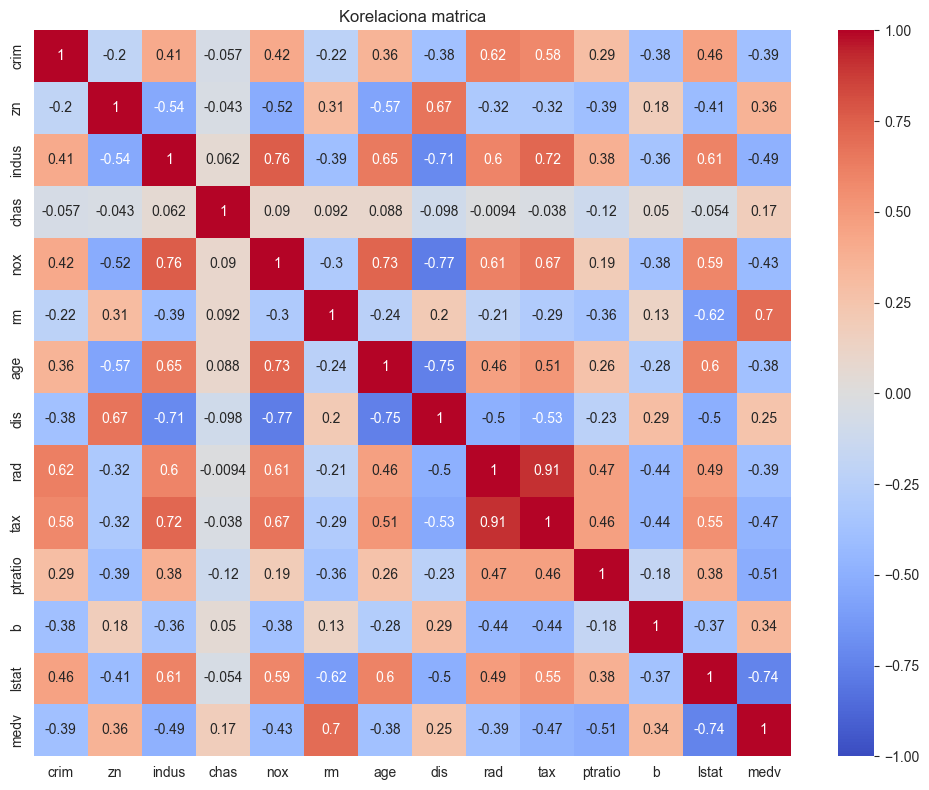

In [54]:
# Kreiraj korelacionu matricu
corr_matrix = df.corr(numeric_only=True).round(2)

plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelaciona matrica")
plt.tight_layout()
plt.show()

### Izbor variajbli

In [55]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Podela podataka: 80% train, 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Kako izabrati prediktore?

# Vatijable cija je apsolutna vrednost iznad 0.5
# - Prag 0.5 se u praksi cesto koristi kao prvi prag.

# Varijable cija je apsolutna vrednost ispod 0.5
# - Additivni doprinos – zbir slabih prediktora može značajno povećati R² kad se kombinuju.
# - Ako domen nalaže da nešto utiče na izlaznu varijablu


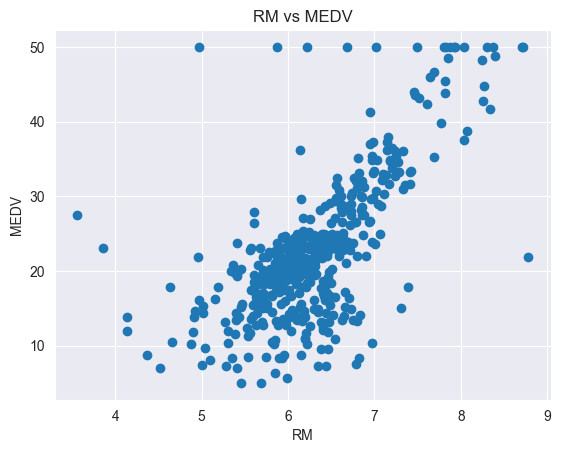

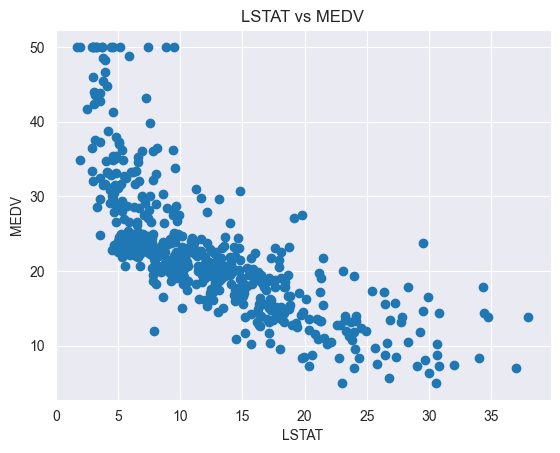

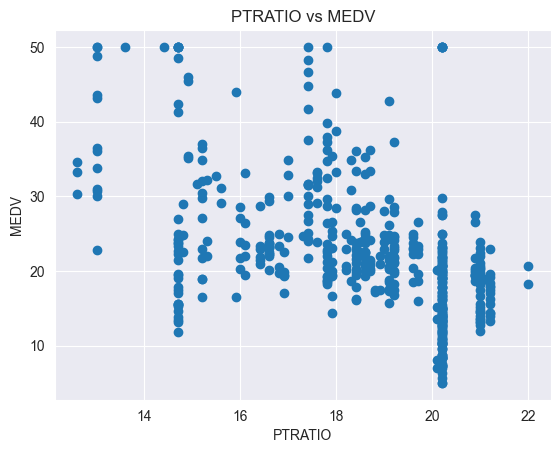

In [56]:
# ─────────────────────────────────────────────────────────────
# 1) Scatter-plotovi pre modeliranja
# ─────────────────────────────────────────────────────────────
plt.figure()
plt.scatter(df['rm'], df['medv'])
plt.xlabel('RM'); plt.ylabel('MEDV'); plt.title('RM vs MEDV')
plt.show()

plt.figure()
plt.scatter(df['lstat'], df['medv'])
plt.xlabel('LSTAT'); plt.ylabel('MEDV'); plt.title('LSTAT vs MEDV')
plt.show()

plt.figure()
plt.scatter(df['ptratio'], df['medv'])
plt.xlabel('PTRATIO'); plt.ylabel('MEDV'); plt.title('PTRATIO vs MEDV')
plt.show()
# ─────────────────────────────────────────────────────────────

### Kreiranje modela

In [57]:

# Višestruki linearni modeli

lm1 = smf.ols('medv ~ lstat + rm', data=train_df).fit()

lm2 = smf.ols('medv ~ lstat + rm + ptratio', data=train_df).fit()

# lm3 – svi (numerički) prediktori
all_num = train_df.select_dtypes('number').columns.drop('medv')
lm3 = smf.ols('medv ~ ' + ' + '.join(all_num), data=train_df).fit()


### Pravljenje predikcija

In [65]:
# Predikcije na test-skupu i pregled rezultata

test_pred = test_df.copy()  # ne menjaj original

test_pred['pred_lm1'] = lm1.predict(test_pred)
test_pred['pred_lm2'] = lm2.predict(test_pred)
test_pred['pred_lm3'] = lm3.predict(test_pred)

# Prikaz – prvih 15 redova
cols_to_show = ['medv', 'pred_lm1', 'pred_lm2', 'pred_lm3']
display(test_pred[cols_to_show].head(15))


,medv,pred_lm1,pred_lm2,pred_lm3
367,23.1,8.595569,8.206022,7.743338
77,20.8,23.269813,22.877575,23.619224
380,10.4,23.884454,22.135667,16.176240
161,50.0,35.907733,37.946193,37.202040
109,19.4,20.677500,18.554084,20.171115
400,5.6,12.730126,12.134169,12.739858
383,12.3,11.384246,10.883639,13.224427
129,14.3,15.692960,13.787402,14.553260
72,22.8,25.630572,24.495495,24.615007
456,12.7,17.217721,16.107051,11.361365


### Izračunavanje metrika na test setu i poređenje rezultata

In [71]:
# y_true i y_pred
y_true = test_pred['medv']
y_pred = test_pred['pred_lm3']   # predikcije modela lm1

# RSS (Residual Sum of Squares) -  velike greške dobijaju veću težinu
rss = ((y_pred - y_true) ** 2).sum()

# TSS (Total Sum of Squares)
tss = ((y_true.mean() - y_true) ** 2).sum() # TSS meri totalnu „nepredvidivost“

# R² na test-skupu
r2_test = 1 - rss / tss

# RMSE na test-skupu
#Kvadriramo da izbegnemo +/-
#Onda uzmemo koren da vratimo na realnu skalu. Deljenjem sa duzinom vracamo skalu na jednu opservaciju
rmse_test = np.sqrt(rss / len(y_true))

print(f"RSS = {rss:.2f}") # tezimo nuli
print(f"R²  = {r2_test:.3f}") # Veće je bolje -  procenat varijanse objašnjen modelom
print(f"RMSE = {rmse_test:.2f}") # tezimo nuli


# Najbolje rezultate daje model 3 - da li znaci da je najbolji?

RSS = 2911.83
R²  = 0.664
RMSE = 5.40


### Prover multikolinearnosti

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#  Računanje VIF za sve prediktore

# Pripremamo X: svi prediktori iz train_df + konstanta
X = sm.add_constant(train_df.drop(columns='medv'))

# Računamo VIF za svaki prediktor i vadimo kvadratni koren (√VIF)
# √VIF iznad 2 - potencijalna kolinearnost (prag po izboru)
print("√VIF sa svim prediktorima:")
print((pd.Series([vif(X.values, i) for i in range(X.shape[1])], index=X.columns) ** 0.5).sort_values(ascending=False))


# Ponovno računanje VIF nakon izbacivanja 'tax'
X_no_tax = sm.add_constant(train_df.drop(columns=['medv', 'tax']))

# Ponovo računamo √VIF
print((pd.Series([vif(X_no_tax.values, i) for i in range(X_no_tax.shape[1])], index=X_no_tax.columns) ** 0.5).sort_values(ascending=False))


NameError: name 'sm' is not defined